In [1]:
import pandas as pd

from bs4 import BeautifulSoup

import requests

In [ ]:
df_main = pd.read_csv('data.csv')

df_main.head()

In [ ]:
df_powers = pd.read_csv('super_hero_powers.csv')

df_powers.head()

In [ ]:
df_main = df_main.merge(df_powers, left_on='Name', right_on='hero_names', how='inner')


df_main = df_main[df_main.columns[2:]]

df_main .head()

In [ ]:


##"https://www.superherodb.com/abraxas/10-181/history/"

#"https://www.superherodb.com"+url_link+"powers/"
history_texts = []
powers_texts = []

for idx, url_link in enumerate(df_main['Url']):
    url = "https://www.superherodb.com"+url_link+"powers/"
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data)
    powers_texts.append('\n\n'.join([tag.text for tag in soup.findAll(['p']) if tag.text not in ["","-"]]))
    
    url = "https://www.superherodb.com"+url_link+"history/"
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data)
    history_texts.append('\n\n'.join([tag.text for tag in soup.findAll(['p']) if tag.text not in ["","-"]]))
    
    if idx%10 == 0:
        print((idx+1)/len(df_main))
    



In [ ]:
df_main['history_text'] = history_texts
df_main['powers_text'] = powers_texts

df_main.head()

In [ ]:
#df_main.to_csv('data_with_text.csv')



In [4]:
df_main = pd.read_csv('data_with_text.csv')

texts = list(df_main['Name'])
#powers_texts = df_main['powers_text']

df_main.head()

,Unnamed: 0,Name,Url,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Full name,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,history_text,powers_text
0,0,3-D Man,/3-d-man/10-226/,80.0,35.0,45.0,35.0,25.0,55.0,Charles Chandler,...,False,False,False,False,False,False,False,False,3-D Man was was a 1950's hero who came about t...,"The 3-D Man possess strength, durability, spee..."
1,1,A-Bomb,/a-bomb/10-10060/,75.0,100.0,20.0,80.0,25.0,65.0,Richard Milhouse Jones,...,False,False,False,False,False,False,False,False,"Richard ""Rick"" Jones was orphaned at a young a...","On rare occasions, and through unusual circums..."
2,2,Abe Sapien,/abe-sapien/10-956/,95.0,30.0,35.0,65.0,100.0,85.0,Abraham Sapien,...,False,False,False,False,False,False,False,False,"Sapien began life as Langdon Everett Caul, a V...",Abe is a humanoid amphibious creature. He has ...
3,3,Abin Sur,/abin-sur/10-1460/,80.0,90.0,55.0,65.0,100.0,65.0,-,...,False,False,False,False,False,False,False,False,Originally a history professor on the planet U...,Abin Sur possessed an exceptionally strong sen...
4,4,Abomination,/abomination/10-1/,85.0,80.0,55.0,90.0,65.0,95.0,Emil Blonsky,...,False,False,False,False,False,False,False,False,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...


In [5]:
#from gensim.parsing.preprocessing import strip_non_alphanum

#texts = [str(s).replace("\n"," ") for s in texts]

#texts[:1000]

In [6]:
texts

['3-D Man',
 'A-Bomb',
 'Abe Sapien',
 'Abin Sur',
 'Abomination',
 'Abraxas',
 'Absorbing Man',
 'Adam Monroe',
 'Adam Strange',
 'Agent Bob',
 'Agent Zero',
 'Air-Walker',
 'Ajax',
 'Alex Mercer',
 'Alex Woolsly',
 'Alien',
 'Allan Quatermain',
 'Amazo',
 'Ammo',
 'Ando Masahashi',
 'Angel',
 'Angel',
 'Angel Dust',
 'Angel Salvadore',
 'Angela',
 'Animal Man',
 'Annihilus',
 'Ant-Man',
 'Ant-Man II',
 'Anti-Monitor',
 'Anti-Spawn',
 'Anti-Venom',
 'Apocalypse',
 'Aquababy',
 'Aqualad',
 'Aquaman',
 'Arachne',
 'Archangel',
 'Arclight',
 'Ardina',
 'Ares',
 'Ares',
 'Ariel',
 'Armor',
 'Atlas',
 'Atlas',
 'Atom',
 'Atom',
 'Atom Girl',
 'Atom II',
 'Atom III',
 'Atom IV',
 'Aurora',
 'Azazel',
 'Azrael',
 'Aztar',
 'Bananaman',
 'Bane',
 'Banshee',
 'Bantam',
 'Batgirl',
 'Batgirl',
 'Batgirl IV',
 'Batgirl VI',
 'Batman',
 'Batman',
 'Batman II',
 'Battlestar',
 'Batwoman V',
 'Beak',
 'Beast',
 'Beast Boy',
 'Ben 10',
 'Beta Ray Bill',
 'Beyonder',
 'Big Barda',
 'Big Daddy',
 'Big

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [7]:
chars = ' '.join(texts)

characters = sorted(list(set(chars)))

n_to_char = {n:char for n, char in enumerate(characters)}

char_to_n = {char:n for n, char in enumerate(characters)}

char_to_n

{' ': 0,
 '!': 1,
 "'": 2,
 '-': 3,
 '.': 4,
 '0': 5,
 '1': 6,
 '2': 7,
 '3': 8,
 '5': 9,
 '8': 10,
 'A': 11,
 'B': 12,
 'C': 13,
 'D': 14,
 'E': 15,
 'F': 16,
 'G': 17,
 'H': 18,
 'I': 19,
 'J': 20,
 'K': 21,
 'L': 22,
 'M': 23,
 'N': 24,
 'O': 25,
 'P': 26,
 'Q': 27,
 'R': 28,
 'S': 29,
 'T': 30,
 'U': 31,
 'V': 32,
 'W': 33,
 'X': 34,
 'Y': 35,
 'Z': 36,
 'a': 37,
 'b': 38,
 'c': 39,
 'd': 40,
 'e': 41,
 'f': 42,
 'g': 43,
 'h': 44,
 'i': 45,
 'j': 46,
 'k': 47,
 'l': 48,
 'm': 49,
 'n': 50,
 'o': 51,
 'p': 52,
 'q': 53,
 'r': 54,
 's': 55,
 't': 56,
 'u': 57,
 'v': 58,
 'w': 59,
 'x': 60,
 'y': 61,
 'z': 62}

In [8]:
X = []
Y = []

length = 3

for text in texts:
    
    #print(text)
    #print('')
    begin = 0
    
    while begin < len(text)-length:
        end = begin + length
        sequence = text[begin:end]
        label = text[end]
        
        X.append([char_to_n[char] for char in sequence])
        Y.append(char_to_n[label])
        
        #print(sequence,label)
        
        #print([char_to_n[char] for char in sequence],char_to_n[label])
        
        begin +=1
        
    #print('')
    #print('')
    
print(len(df_main),len(X))
    
print(list(zip(X[:5],Y[:5])))



646 3863
[([8, 3, 14], 0), ([3, 14, 0], 23), ([14, 0, 23], 37), ([0, 23, 37], 50), ([11, 3, 12], 51)]


In [9]:
X_modified = np.reshape(X, (len(X), length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [10]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [11]:
model = Sequential()
model.add(LSTM(700, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(700, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(700))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 700)            1965600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 700)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 700)            3922800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 700)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 700)               3922800   
_________________________________________________________________
dropout_3 (Dropout)  

Train on 3669 samples, validate on 194 samples
Epoch 1/270
3669/3669 [==============================] - 21s 6ms/step - loss: 2.6547 - acc: 0.2001 - val_loss: 3.0265 - val_acc: 0.1495
Epoch 2/270
3669/3669 [==============================] - 21s 6ms/step - loss: 2.6437 - acc: 0.2028 - val_loss: 2.9598 - val_acc: 0.2216
Epoch 3/270
3669/3669 [==============================] - 22s 6ms/step - loss: 2.6269 - acc: 0.2041 - val_loss: 2.9391 - val_acc: 0.1907
Epoch 4/270
3669/3669 [==============================] - 20s 6ms/step - loss: 2.6017 - acc: 0.2167 - val_loss: 2.9385 - val_acc: 0.1856
Epoch 5/270
3669/3669 [==============================] - 21s 6ms/step - loss: 2.5816 - acc: 0.2153 - val_loss: 2.9470 - val_acc: 0.2113
Epoch 6/270
3669/3669 [==============================] - 21s 6ms/step - loss: 2.5776 - acc: 0.2153 - val_loss: 2.9413 - val_acc: 0.2216
Epoch 7/270
3669/3669 [==============================] - 20s 6ms/step - loss: 2.5504 - acc: 0.2262 - val_loss: 2.9425 - val_acc: 0.1856
E

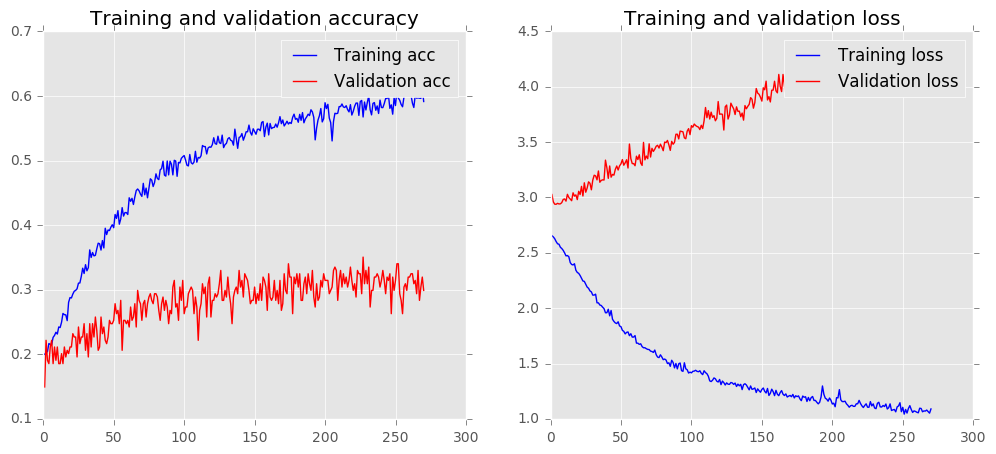

In [14]:
import datetime

nb_epoch = 270
batch_size = 50

t_ini = datetime.datetime.now()
history = model.fit(X_modified, Y_modified,
                        epochs=nb_epoch,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_split=0.05,
                        verbose=1
                        )

t_fin = datetime.datetime.now()
print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))



df_history = pd.DataFrame(history.history)



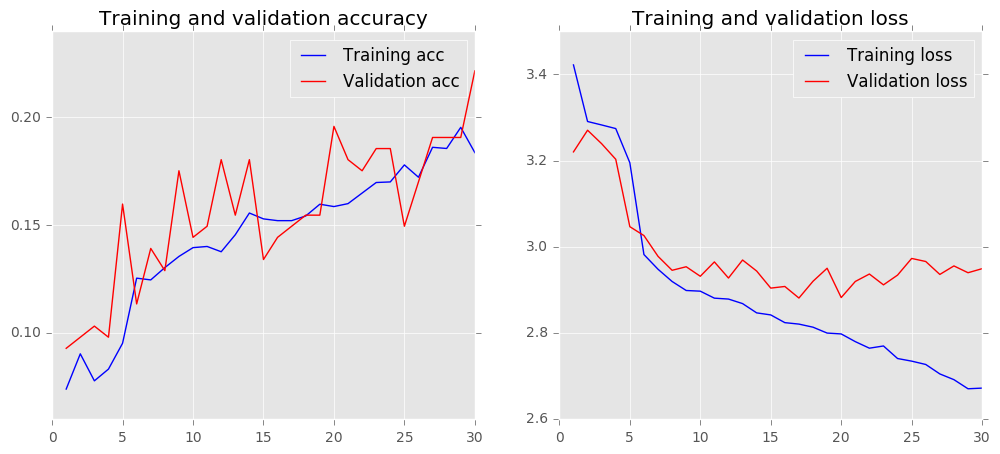

In [13]:
%matplotlib inline
plot_history(history)

In [33]:
import random


for _ in range(200):
    
    try:
    
        word_input = random.choice(np.unique([text[:length] for text in texts]))



        random_length = random.choice([len(text) for text in texts if len(text)>length+2])

        #input_vec = [char_to_n[char] for char in word_input]

        #print(word_input)

        begin = 0



        while len(word_input) < random_length:
            #print(word_input)
            #print(word_input)

            end = begin+length

            #print(word_input,begin,end)

            new_input = word_input[begin:end]



            new_input_vec = np.array([[char_to_n[char] for char in new_input]])

            new_input_vec = np.reshape(new_input_vec, (len(new_input_vec), length, 1))

            new_input_vec = new_input_vec/ float(len(characters))

            #print(new_input_vec)

            pred = np.argmax(model.predict(new_input_vec),axis=1)

            #print(pred)

            word_input = word_input + n_to_char[pred[0]]

            #print(n_to_char[pred[0]])

            begin = begin+1

        final_word = []

        final_word = ' '.join([w for w in word_input.split() if not w.isupper() and len(w)>1])

        if final_word.strip() != '' and final_word.strip() not in texts:
            found_inside = False
            for t in texts:
                if final_word.strip() in t:
                    found_inside = True
                    break
            if found_inside == False:
                print('You shall be called:',final_word)
            
    except:
        pass
    

#word_input,input_vec,random_length 

You shall be called: Molteowolfr Gi
You shall be called: Nathirl Kange
You shall be called: Datah
You shall be called: Raven Goblin
You shall be called: Rider-Gi
You shall be called: Armorain
You shall be called: Morlunne
You shall be called: Exoduorman
You shall be called: Gladian
You shall be called: Triggt
You shall be called: Masticerst
You shall be called: Hellist
You shall be called: Abe So
You shall be called: Verouxado
You shall be called: Onslaugherman
You shall be called: Jessor Firess
You shall be called: Diam Monic
You shall be called: Diam Mon
You shall be called: Siressor Firess
You shall be called: Ben Gob
You shall be called: Abe Sorser
You shall be called: Curser Girl
You shall be called: Onslaugherman
You shall be called: Blue Beeta
You shall be called: Air-Woman
You shall be called: Nina Tri
You shall be called: Nightning
You shall be called: Garbts
You shall be called: Utgardag Sur
You shall be called: Toadk Aana
You shall be called: Sage Drocd
You shall be called: 

In [17]:
model.save('super_hero_name_gen_2.h5')

In [ ]:
new_input_vec

In [ ]:
new_input

In [ ]:
Y